# 2. EDA

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Pseudo-Lab/Tutorial-Book-en/blob/master/book/chapters/en/time-series/Ch2-EDA.ipynb)

In the previous chapter, we examined the structure of deep learning models and evaluation metrics for time series analysis. In this chapter, we will explore and visualize the datasets we will be using to perform time series forecasting in the next chapter.

We will use COVID-19 daily case datasets for the time series forecasting. The datasets we are going to use are [COVID-19 Data Repository by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University](https://github.com/CSSEGISandData/COVID-19) and [Kaggle: Novel Corona Virus 2019 Dataset](https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset?select=covid_19_data.csv).

COVID-19 daily cases by country are updated in the repository of Johns Hopkins University every day, along with various types of datasets, which are provided by Johns Hopkins University on its website and Kaggle.

In chapter 2.1, we will download the COVID-19 daily case datasets to see what features are included in them. In 2.2, we will perform EDA (Exploratory Data Analysis) on the datasets, focusing on world countries, and then in 2.3, we will dive into the COVID-19 daily cases in South Korea.

## 2.1 Download Datasets

Firstly, we will download the COVID-19 daily case datasets. Using the data-loader function coded by Pseudo-Lab, we can easily download the datasets.

Download the datasets from the repository of Tutorial-Book-Utils on GitHub by using `git clone` to save them in the Colab enviroment.

In [ ]:
!git clone https://github.com/Pseudo-Lab/Tutorial-Book-Utils

Cloning into 'Tutorial-Book-Utils'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 24 (delta 6), reused 14 (delta 3), pack-reused 0
Unpacking objects: 100% (24/24), done.


![dataset example](https://github.com/Pseudo-Lab/Tutorial-Book/blob/master/book/pics/TS-ch2img01.PNG?raw=true)

- Figure 2-1. Downloaded Files in Colab

In Figure 2-1, you can see `PL_data_loader.py` in the directory, in addition to `README.md` and `utils_ObjectDetection.py`. <code>PL_data_loader.py</code> contains the functions to download Google Drive datasets. It is possible to download the COVID-19 daily case datasets with the input of <code>COVIDTimeSeries</code> if we use the parameter <code>--data</code>.


In [ ]:
!python Tutorial-Book-Utils/PL_data_loader.py --data COVIDTimeSeries

COVIDTimeSeries.zip is done!


Next, let's unarchive the downloaded file by using `unzip`, which is a Linux command. Unnecessary outputs are not printed if we use the command `-q`.

In [ ]:
!unzip -q COVIDTimeSeries.zip

![dataset example](https://github.com/Pseudo-Lab/Tutorial-Book/blob/master/book/pics/TS-ch2img02.PNG?raw=true)

- Figure 2-2. Downloaded Datasets

Once the `COVIDTimesSeries.zip` is unarchived, you can see two downloaded files: `covid_19_data.csv` and <code>time_series_covid19_confirmed_global.csv</code> (Figure 2-2).

We will visualize the global COVID-19 daily cases with `covid_19_data.csv` based on time series, and we will visualize the daily cases of COVID-19 in South Korea with `time_series_covid19_confirmed_global.csv`. Let's first view the saved values after loading each dataset.

In [ ]:
import pandas as pd

all = pd.read_csv('covid_19_data.csv')
confirmed = pd.read_csv('time_series_covid19_confirmed_global.csv')

`all` contains daily confirmed cases, daily deaths, and daily recovered data. The dataframe of the dataset consists of `ObservationDate`, `Province/State`, `Country/Region`, `Confirmed`, `Deaths`, and `Recovered`.

In [ ]:
all

SNo ObservationDate     Province/State  ... Confirmed  Deaths  Recovered
0            1      01/22/2020              Anhui  ...       1.0     0.0        0.0
1            2      01/22/2020            Beijing  ...      14.0     0.0        0.0
2            3      01/22/2020          Chongqing  ...       6.0     0.0        0.0
3            4      01/22/2020             Fujian  ...       1.0     0.0        0.0
4            5      01/22/2020              Gansu  ...       0.0     0.0        0.0
...        ...             ...                ...  ...       ...     ...        ...
172475  172476      12/06/2020  Zaporizhia Oblast  ...   36539.0   337.0     6556.0
172476  172477      12/06/2020            Zeeland  ...    6710.0   104.0        0.0
172477  172478      12/06/2020           Zhejiang  ...    1295.0     1.0     1288.0
172478  172479      12/06/2020    Zhytomyr Oblast  ...   31967.0   531.0    22263.0
172479  172480      12/06/2020       Zuid-Holland  ...  154813.0  2414.0        0.0

[172480 rows x 8 columns]

`confirmed` is sequential data showing daily cases by country. `Country/Region` and `Province/State` are location data. `Long` and `Lat` are longitude and latitude, respectively. `MM/DD/YYYY` column records daily confirmed cases. The dataframe looks like below.

In [ ]:
confirmed

Province/State      Country/Region        Lat  ...  12/16/20  12/17/20  12/18/20
0              NaN         Afghanistan  33.939110  ...     49161     49378     49621
1              NaN             Albania  41.153300  ...     50637     51424     52004
2              NaN             Algeria  28.033900  ...     93507     93933     94371
3              NaN             Andorra  42.506300  ...      7446      7466      7519
4              NaN              Angola -11.202700  ...     16407     16484     16562
..             ...                 ...        ...  ...       ...       ...       ...
266            NaN             Vietnam  14.058324  ...      1405      1407      1410
267            NaN  West Bank and Gaza  31.952200  ...    115606    117755    119612
268            NaN               Yemen  15.552727  ...      2085      2087      2087
269            NaN              Zambia -13.133897  ...     18456     18504     18575
270            NaN            Zimbabwe -19.015438  ...     11749     11866     12047

[271 rows x 336 columns]

## 2.2 EDA of World Data

Let's visualize the global COVID-19 daily cases using `all`. As mentioned above, there are two location data: `Province/State` and `Country/Region`. We will add the daily cases of every country based on `Country/Region`.


In [ ]:
group = all.groupby(['ObservationDate', 'Country/Region'])['Confirmed'].sum()
group = group.reset_index()
group.head()

ObservationDate  Country/Region  Confirmed
0      01/22/2020       Hong Kong        0.0
1      01/22/2020           Japan        2.0
2      01/22/2020           Macau        1.0
3      01/22/2020  Mainland China      547.0
4      01/22/2020     South Korea        1.0

You can now see daily confirmed cases by country. Next, we will visualize world daily cases on the world map with animation effects. We can create the visualization with the `plotly.express` package. 

In [ ]:
import plotly as py
import plotly.express as px

With `px.choropleth`, we create the map layer, and then update dates through `.update_layout`.

Each parameter is as follows:

- location : name of the column which indicates location information in the dataframe

- locationmode : the range of countries (‘ISO-3’, ‘USA-states’, and ‘country names’)

- color : name of the column which has data to be expressed on the diagram

- animation_frame : name of the column for animation effects

Press the play button to see the COVID-19 daily case graphs.

In [ ]:
choro_map=px.choropleth(group, 
                    locations="Country/Region", 
                    locationmode = "country names",
                    color="Confirmed", 
                    animation_frame="ObservationDate"
                   )

choro_map.update_layout(
    title_text = 'Global Spread of Coronavirus',
    title_x = 0.5,
    geo=dict(
        showframe = False,
        showcoastlines = False,
    ))
    
choro_map.show()

You can see that COVID-19 begins in China and then gradually spreads throughout the world. According to the visualization, recently there are a lot of cumulative cases in North America, South America, and India, compared to other countries. 

## 2.3 EDA of South Korean Dataset

This time, we will extract the South Korean data from `confirmed`. The data is cumulative, which means it shows the sum of all cases on a given date.

In [ ]:
confirmed[confirmed['Country/Region']=='Korea, South']

Province/State Country/Region        Lat  ...  12/16/20  12/17/20  12/18/20
157            NaN   Korea, South  35.907757  ...     46453     47515     48570

[1 rows x 336 columns]

Excluding the `Lat` and `Long` columns, we only have the date and cases columns. For coding convenience, let's flip the rows and columns and change the date format from <code>str</code> to <code>datetime</code> (<code>to_datetime</code>).

In [ ]:
korea = confirmed[confirmed['Country/Region']=='Korea, South'].iloc[:,4:].T
korea.index = pd.to_datetime(korea.index)
korea

157
2020-01-22      1
2020-01-23      1
2020-01-24      2
2020-01-25      2
2020-01-26      3
...           ...
2020-12-14  44364
2020-12-15  45442
2020-12-16  46453
2020-12-17  47515
2020-12-18  48570

[332 rows x 1 columns]

Let's visualize the data with `matplotlib.pyplot` and `seaborn`, which are representative visualization packages. With `%matplotlib inline`, the matplotlib graphs will be included in the notebook, along with the code. You can change the figure size through `rcParams['figure.figsize']` from `pylab` and the style and font size through `sns.set`.

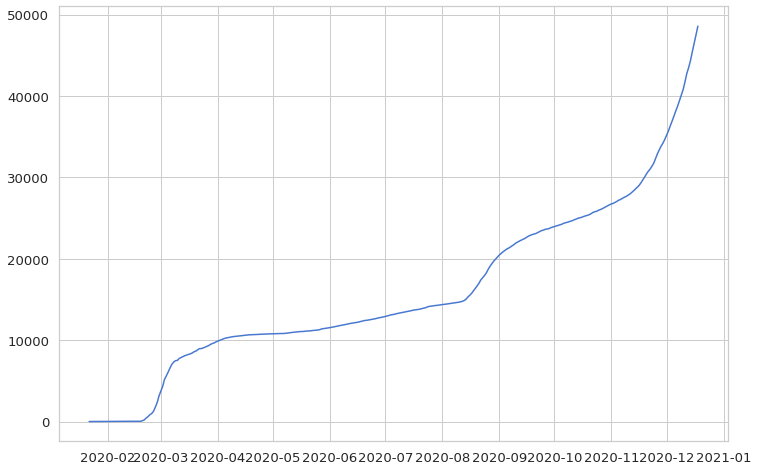

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
sns.set(style='whitegrid', palette='muted', font_scale=1.2)

plt.plot(korea)
plt.show()

Now, let's look at daily cases instead of cumulative cases. Using the `diff` function, it is possible to tell the difference between each row, which makes it easier to transform cumulative data into daily data. However, there is a missing value in the first row of the cumulative data, which we need to fill. Also, we will change the data format to an integer (<code>int</code>).

In [ ]:
daily_cases = korea.diff().fillna(korea.iloc[0]).astype('int')
daily_cases

157
2020-01-22     1
2020-01-23     0
2020-01-24     1
2020-01-25     0
2020-01-26     1
...          ...
2020-12-14   880
2020-12-15  1078
2020-12-16  1011
2020-12-17  1062
2020-12-18  1055

[332 rows x 1 columns]

The following visualization is the output for daily cases. Since we already created a visualization, the visualization parameters will be based on the previous data unless you reset the parameters.

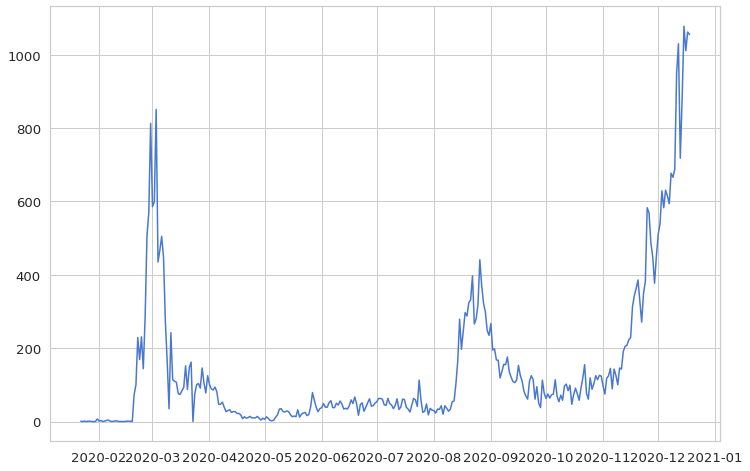

In [ ]:
plt.plot(daily_cases)
plt.show()

There are spikes in the beginning of March and late August. At the end of the year, new daily cases skyrocket.

In this chapter, we explored COVID-19 confirmed case datasets in South Korea and across the world. In the next chapter, we will learn about data pre-processing of COVID-19 daily cases, using South Korea as our example, and use a deep learning model for time series forecasting.